In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math 
from sklearn.metrics import mean_squared_error

In [270]:
timestep = 50
days_predict = 14

In [271]:
x_train = np.load("./data/x_train.npy")
y_train = np.load("./data/y_train.npy")
x_test = np.load("./data/x_test.npy")
y_test = np.load("./data/y_test.npy")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(404, 50, 1)
(404,)
(0,)
(0,)


In [313]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(timestep,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_97 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_98 (LSTM)              (None, 50)                20200     
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [314]:
#don't need mini-batches on such small data
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50,verbose=1)

Epoch 1/50


2022-02-13 12:08:50.096390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:08:50.497723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:08:50.652156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:08:50.831545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:08:51.043802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:08:51.341548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:08:51.660837: I tensorflow/core/grappler/optimizers/cust

13/13 [==============================] - 4s 129ms/step - loss: 0.2070
Epoch 2/50
13/13 [==============================] - 1s 57ms/step - loss: 0.0216
Epoch 3/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0162
Epoch 4/50
13/13 [==============================] - 1s 51ms/step - loss: 0.0096
Epoch 5/50
13/13 [==============================] - 1s 53ms/step - loss: 0.0081
Epoch 6/50
13/13 [==============================] - 1s 53ms/step - loss: 0.0066
Epoch 7/50
13/13 [==============================] - 1s 51ms/step - loss: 0.0056
Epoch 8/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0050
Epoch 9/50
13/13 [==============================] - 1s 48ms/step - loss: 0.0052
Epoch 10/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0045
Epoch 11/50
13/13 [==============================] - 1s 48ms/step - loss: 0.0047
Epoch 12/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0048
Epoch 13/50
13/13 [============================

In [315]:
#needed to do here again, purely so can do scaler inverse 
#transform, to be able to calculuse RMSE
df = pd.read_csv('./data/ETH-CAD.csv')
df = df.iloc[1100:]
df_close = df.reset_index()['Close']

scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))



In [316]:
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)
# test_predict = model.predict(x_test)
# test_predict = scaler.inverse_transform(test_predict)


2022-02-13 12:09:29.684730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:09:29.781858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:09:29.902893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 12:09:30.055563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [317]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))
# print(math.sqrt(mean_squared_error(y_test, test_predict)))

3686.5104290849963


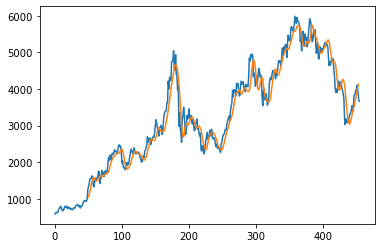

In [318]:
look_back=timestep
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
# testPredictPlot = np.empty_like(df_close)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
plt.show()

In [319]:
training_size = int(len(df_close)*1)
test_size = int(len(df_close)) - training_size
train_data, test_data = df_close[0:training_size:],df_close[training_size:len(df_close),:1]
print(len(test_data))

0


In [320]:
#len(test_data)-num_steps_back is the number to which you index here
x_input=train_data[(len(train_data))-timestep:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.8619922629618395,
 0.8565227900951236,
 0.847371407394502,
 0.7933121360421234,
 0.7501827686502149,
 0.767859208690344,
 0.753243326209241,
 0.7736225399190171,
 0.7889946783423815,
 0.7794315322122519,
 0.7838743092407803,
 0.7301868364518009,
 0.6971086913092457,
 0.6387726502354524,
 0.6151238325017366,
 0.630812614636399,
 0.6143849369931796,
 0.6454338318524336,
 0.6720201482596297,
 0.643635102152242,
 0.6602838065910315,
 0.6650535347816721,
 0.6694822065851238,
 0.6357625007273459,
 0.6234999265020779,
 0.6084650922449323,
 0.586001247114701,
 0.4871168646642454,
 0.45153341844758565,
 0.48093060333868287,
 0.4618089225159613,
 0.46504611148384845,
 0.46967727433719353,
 0.4631843604705662,
 0.49344955778809263,
 0.505269264944121,
 0.5064083503831667,
 0.5243397238674721,
 0.5473787630105033,
 0.5215399318702482,
 0.5202757982000573,
 0.596552932830748,
 0.6033514592901124,
 0.6129052921792871,
 0.6283207408580925,
 0.625965126976077,
 0.6516769209099397,
 0.61692586259349

In [321]:
#just to make trying training all the data predicitons easier
test_data = train_data

lst_output=[]
n_steps=timestep
i=0
while(i<days_predict):
    
    if(len(temp_input)>timestep):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6571665]
51
1 day input [0.85652279 0.84737141 0.79331214 0.75018277 0.76785921 0.75324333
 0.77362254 0.78899468 0.77943153 0.78387431 0.73018684 0.69710869
 0.63877265 0.61512383 0.63081261 0.61438494 0.64543383 0.67202015
 0.6436351  0.66028381 0.66505353 0.66948221 0.6357625  0.62349993
 0.60846509 0.58600125 0.48711686 0.45153342 0.4809306  0.46180892
 0.46504611 0.46967727 0.46318436 0.49344956 0.50526926 0.50640835
 0.52433972 0.54737876 0.52153993 0.5202758  0.59655293 0.60335146
 0.61290529 0.62832074 0.62596513 0.65167692 0.61692586 0.58142628
 0.56894982 0.65716648]
1 day output [[0.6481719]]
2 day input [0.84737141 0.79331214 0.75018277 0.76785921 0.75324333 0.77362254
 0.78899468 0.77943153 0.78387431 0.73018684 0.69710869 0.63877265
 0.61512383 0.63081261 0.61438494 0.64543383 0.67202015 0.6436351
 0.66028381 0.66505353 0.66948221 0.6357625  0.62349993 0.60846509
 0.58600125 0.48711686 0.45153342 0.4809306  0.46180892 0.46504611
 0.46967727 0.46318436 0.49344956 0.5052

In [322]:
print(len(df_close))

455


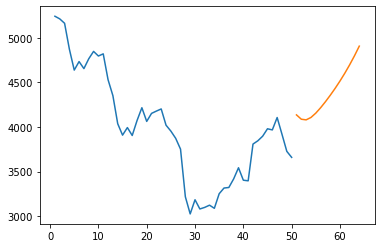

In [323]:
day_new=np.arange(1,timestep + 1)
day_pred=np.arange(timestep + 1,timestep + 1 + days_predict)
#this num is len(df_close)-30
plt.plot(day_new,scaler.inverse_transform(df_close[len(df_close)-timestep:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

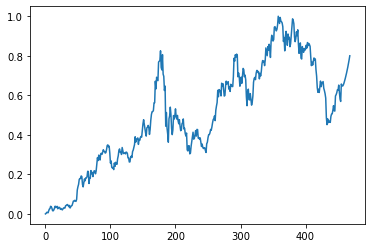

In [324]:
df_new=df_close.tolist()
df_new.extend(lst_output)
plt.plot(df_new[:])

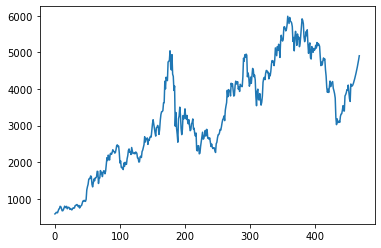

In [325]:
df_new=scaler.inverse_transform(df_new).tolist()
plt.plot(df_new)